In [68]:
import pandas as pd 
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os 
from zipfile import ZipFile

def extract_data(file_name, file_path): 
    !kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data --force

GlobalLandTemperaturesByCity = "GlobalLandTemperaturesByCity.csv"
GlobalLandTemperaturesByCountry = "GlobalLandTemperaturesByCountry.csv" 

raw_data_path = os.path.join(os.path.pardir,'data','raw')
extract_data(GlobalLandTemperaturesByCity, raw_data_path)
extract_data(GlobalLandTemperaturesByCountry, raw_data_path)

zf = ZipFile('climate-change-earth-surface-temperature-data.zip')
print(zf.namelist())
country_df = pd.read_csv(zf.open('GlobalLandTemperaturesByCountry.csv'))
city_df = pd.read_csv(zf.open('GlobalLandTemperaturesByMajorCity.csv'))


  0%|          | 0.00/84.7M [00:00<?, ?B/s]
  0%|          | 0.00/84.7M [00:00<?, ?B/s]
Traceback (most recent call last):
  File "c:\users\ericw\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\ericw\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ericw\anaconda3\Scripts\kaggle.exe\__main__.py", line 7, in <module>
  File "c:\users\ericw\anaconda3\lib\site-packages\kaggle\cli.py", line 51, in main
    out = args.func(**command_args)
  File "c:\users\ericw\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1270, in dataset_download_cli
    quiet=quiet)
  File "c:\users\ericw\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1219, in dataset_download_files
    self.download_file(response, outfile, quiet)
  File "c:\users\ericw\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1577, in download_file
    with open(outfile, 'wb') as out:
P

['GlobalLandTemperaturesByCity.csv', 'GlobalLandTemperaturesByCountry.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalTemperatures.csv']


In [69]:
city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [67]:
country_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,01
3,1744-02-01,NaN,NaN,Åland,1744,02
4,1744-03-01,NaN,NaN,Åland,1744,03
...,...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013,05
577458,2013-06-01,17.613,0.473,Zimbabwe,2013,06
577459,2013-07-01,17.000,0.453,Zimbabwe,2013,07
577460,2013-08-01,19.759,0.717,Zimbabwe,2013,08


In [4]:
city_df['City'].unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [5]:
country_df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
city_df.loc[city_df['Country'] == 'China']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47038,1820-08-01,19.674,2.283,Changchun,China,44.20N,125.22E
47039,1820-09-01,14.841,1.792,Changchun,China,44.20N,125.22E
47040,1820-10-01,4.825,1.911,Changchun,China,44.20N,125.22E
47041,1820-11-01,-5.807,2.309,Changchun,China,44.20N,125.22E
47042,1820-12-01,-15.398,2.601,Changchun,China,44.20N,125.22E
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [7]:
country_df.loc[country_df['Country'] == 'China']

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
110149,1820-08-01,16.684,1.978,China
110150,1820-09-01,13.292,1.555,China
110151,1820-10-01,5.624,1.383,China
110152,1820-11-01,-1.981,1.340,China
110153,1820-12-01,-8.551,1.508,China
...,...,...,...,...
112462,2013-05-01,14.824,0.171,China
112463,2013-06-01,18.636,0.238,China
112464,2013-07-01,20.482,0.153,China
112465,2013-08-01,19.971,0.223,China


In [8]:
country_df['dt'] = pd.to_datetime(country_df['dt'])
city_df['dt'] = pd.to_datetime(city_df['dt'])

In [9]:
country_df['Year'] = country_df['dt'].map(lambda x: x.strftime('%Y'))
country_df['Month'] = country_df['dt'].map(lambda x: x.strftime('%m'))
country_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,01
3,1744-02-01,NaN,NaN,Åland,1744,02
4,1744-03-01,NaN,NaN,Åland,1744,03
...,...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013,05
577458,2013-06-01,17.613,0.473,Zimbabwe,2013,06
577459,2013-07-01,17.000,0.453,Zimbabwe,2013,07
577460,2013-08-01,19.759,0.717,Zimbabwe,2013,08


In [10]:
city_df['Year'] = city_df['dt'].map(lambda x: x.strftime('%Y'))
city_df['Month'] = city_df['dt'].map(lambda x: x.strftime('%m'))
city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05
...,...,...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,2013,05
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,2013,06
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,2013,07
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E,2013,08


In [11]:
new_city_df = city_df.dropna()
city_df = new_city_df.drop(columns = ['AverageTemperatureUncertainty'])
city_df

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05
...,...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,Xian,China,34.56N,108.97E,2013,04
239172,2013-05-01,18.979,Xian,China,34.56N,108.97E,2013,05
239173,2013-06-01,23.522,Xian,China,34.56N,108.97E,2013,06
239174,2013-07-01,25.251,Xian,China,34.56N,108.97E,2013,07


In [12]:
jap = city_df.loc[city_df['City'] == 'Tokyo']
jap_avg = jap.groupby('Year').mean()
jap_avg.head(30)
#jap_avg.loc[jap_avg['Year'] == 1850]


,AverageTemperature
Year,
1845,11.948167
1846,12.404500
1847,12.207500
1848,12.136500
1849,12.138250
1850,11.714750
1851,11.761500
1852,11.728250
1853,11.857667


In [13]:
y = np.abs(stats.zscore(jap_avg))
threshold = 3 
print(np.where(y>3))

(array([25], dtype=int64), array([0], dtype=int64))


## Second Industrial Revolution 1870-1914 

## Ford Assembly Line - December 1913 

## Important countries for SIR: USA, UK, Germany, France, Japan 

In [14]:
city_df['Year'] = pd.to_numeric(city_df['Year'])

In [15]:
city_df = city_df[(city_df.Year >= 1870) & (city_df.Year <= 1940)]
city_df

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
290,1873-03-01,27.658,Abidjan,Côte D'Ivoire,5.63N,3.23W,1873,03
292,1873-05-01,26.526,Abidjan,Côte D'Ivoire,5.63N,3.23W,1873,05
293,1873-06-01,25.815,Abidjan,Côte D'Ivoire,5.63N,3.23W,1873,06
294,1873-07-01,24.645,Abidjan,Côte D'Ivoire,5.63N,3.23W,1873,07
295,1873-08-01,24.116,Abidjan,Côte D'Ivoire,5.63N,3.23W,1873,08
...,...,...,...,...,...,...,...,...
238299,1940-08-01,20.933,Xian,China,34.56N,108.97E,1940,08
238300,1940-09-01,17.114,Xian,China,34.56N,108.97E,1940,09
238301,1940-10-01,12.926,Xian,China,34.56N,108.97E,1940,10
238302,1940-11-01,5.115,Xian,China,34.56N,108.97E,1940,11


In [16]:
uk = city_df.loc[city_df['Country'] == 'United Kingdom']
uk

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
130121,1870-01-01,2.828,London,United Kingdom,52.24N,0.00W,1870,01
130122,1870-02-01,1.742,London,United Kingdom,52.24N,0.00W,1870,02
130123,1870-03-01,4.337,London,United Kingdom,52.24N,0.00W,1870,03
130124,1870-04-01,9.010,London,United Kingdom,52.24N,0.00W,1870,04
130125,1870-05-01,11.746,London,United Kingdom,52.24N,0.00W,1870,05
...,...,...,...,...,...,...,...,...
130968,1940-08-01,16.133,London,United Kingdom,52.24N,0.00W,1940,08
130969,1940-09-01,13.303,London,United Kingdom,52.24N,0.00W,1940,09
130970,1940-10-01,9.476,London,United Kingdom,52.24N,0.00W,1940,10
130971,1940-11-01,6.714,London,United Kingdom,52.24N,0.00W,1940,11


In [17]:
usa = city_df.loc[city_df['Country'] == 'United States']
usa

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
53188,1870-01-01,-0.455,Chicago,United States,42.59N,87.27W,1870,01
53189,1870-02-01,-0.568,Chicago,United States,42.59N,87.27W,1870,02
53190,1870-03-01,0.752,Chicago,United States,42.59N,87.27W,1870,03
53191,1870-04-01,8.580,Chicago,United States,42.59N,87.27W,1870,04
53192,1870-05-01,14.429,Chicago,United States,42.59N,87.27W,1870,05
...,...,...,...,...,...,...,...,...
172130,1940-08-01,19.603,New York,United States,40.99N,74.56W,1940,08
172131,1940-09-01,16.097,New York,United States,40.99N,74.56W,1940,09
172132,1940-10-01,8.802,New York,United States,40.99N,74.56W,1940,10
172133,1940-11-01,4.651,New York,United States,40.99N,74.56W,1940,11


In [18]:
usa['City'].unique()

array(['Chicago', 'Los Angeles', 'New York'], dtype=object)

In [19]:
chicago = usa.loc[usa['City'] == 'Chicago']
chicago

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
53188,1870-01-01,-0.455,Chicago,United States,42.59N,87.27W,1870,01
53189,1870-02-01,-0.568,Chicago,United States,42.59N,87.27W,1870,02
53190,1870-03-01,0.752,Chicago,United States,42.59N,87.27W,1870,03
53191,1870-04-01,8.580,Chicago,United States,42.59N,87.27W,1870,04
53192,1870-05-01,14.429,Chicago,United States,42.59N,87.27W,1870,05
...,...,...,...,...,...,...,...,...
54035,1940-08-01,22.363,Chicago,United States,42.59N,87.27W,1940,08
54036,1940-09-01,18.531,Chicago,United States,42.59N,87.27W,1940,09
54037,1940-10-01,14.164,Chicago,United States,42.59N,87.27W,1940,10
54038,1940-11-01,5.627,Chicago,United States,42.59N,87.27W,1940,11


In [20]:
newyork = usa.loc[usa['City'] == 'New York']
newyork

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
171283,1870-01-01,0.685,New York,United States,40.99N,74.56W,1870,01
171284,1870-02-01,-2.639,New York,United States,40.99N,74.56W,1870,02
171285,1870-03-01,-0.290,New York,United States,40.99N,74.56W,1870,03
171286,1870-04-01,8.939,New York,United States,40.99N,74.56W,1870,04
171287,1870-05-01,14.852,New York,United States,40.99N,74.56W,1870,05
...,...,...,...,...,...,...,...,...
172130,1940-08-01,19.603,New York,United States,40.99N,74.56W,1940,08
172131,1940-09-01,16.097,New York,United States,40.99N,74.56W,1940,09
172132,1940-10-01,8.802,New York,United States,40.99N,74.56W,1940,10
172133,1940-11-01,4.651,New York,United States,40.99N,74.56W,1940,11


In [21]:
germany = city_df.loc[city_df['Country'] == 'Germany']
germany

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
26014,1870-01-01,-0.078,Berlin,Germany,52.24N,13.14E,1870,01
26015,1870-02-01,-5.723,Berlin,Germany,52.24N,13.14E,1870,02
26016,1870-03-01,1.205,Berlin,Germany,52.24N,13.14E,1870,03
26017,1870-04-01,8.325,Berlin,Germany,52.24N,13.14E,1870,04
26018,1870-05-01,13.714,Berlin,Germany,52.24N,13.14E,1870,05
...,...,...,...,...,...,...,...,...
26861,1940-08-01,15.649,Berlin,Germany,52.24N,13.14E,1940,08
26862,1940-09-01,12.966,Berlin,Germany,52.24N,13.14E,1940,09
26863,1940-10-01,7.979,Berlin,Germany,52.24N,13.14E,1940,10
26864,1940-11-01,6.058,Berlin,Germany,52.24N,13.14E,1940,11


In [22]:
japan = city_df.loc[city_df['Country'] == 'Japan']
japan

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
158780,1870-01-01,3.488,Nagoya,Japan,34.56N,136.22E,1870,01
158781,1870-02-01,3.699,Nagoya,Japan,34.56N,136.22E,1870,02
158782,1870-03-01,7.721,Nagoya,Japan,34.56N,136.22E,1870,03
158783,1870-04-01,12.125,Nagoya,Japan,34.56N,136.22E,1870,04
158784,1870-05-01,17.407,Nagoya,Japan,34.56N,136.22E,1870,05
...,...,...,...,...,...,...,...,...
228812,1940-08-01,23.523,Tokyo,Japan,36.17N,139.23E,1940,08
228813,1940-09-01,20.109,Tokyo,Japan,36.17N,139.23E,1940,09
228814,1940-10-01,15.244,Tokyo,Japan,36.17N,139.23E,1940,10
228815,1940-11-01,10.255,Tokyo,Japan,36.17N,139.23E,1940,11


In [23]:
tokyo = japan.loc[japan['City']== 'Tokyo']
tokyo

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
227969,1870-05-01,15.647,Tokyo,Japan,36.17N,139.23E,1870,05
227970,1870-06-01,19.843,Tokyo,Japan,36.17N,139.23E,1870,06
227971,1870-07-01,23.898,Tokyo,Japan,36.17N,139.23E,1870,07
227972,1870-08-01,23.908,Tokyo,Japan,36.17N,139.23E,1870,08
227973,1870-09-01,20.918,Tokyo,Japan,36.17N,139.23E,1870,09
...,...,...,...,...,...,...,...,...
228812,1940-08-01,23.523,Tokyo,Japan,36.17N,139.23E,1940,08
228813,1940-09-01,20.109,Tokyo,Japan,36.17N,139.23E,1940,09
228814,1940-10-01,15.244,Tokyo,Japan,36.17N,139.23E,1940,10
228815,1940-11-01,10.255,Tokyo,Japan,36.17N,139.23E,1940,11


In [24]:
france = city_df.loc[city_df['Country'] == 'France']
france

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
174522,1870-01-01,2.843,Paris,France,49.03N,2.45E,1870,01
174523,1870-02-01,1.161,Paris,France,49.03N,2.45E,1870,02
174524,1870-03-01,4.634,Paris,France,49.03N,2.45E,1870,03
174525,1870-04-01,10.089,Paris,France,49.03N,2.45E,1870,04
174526,1870-05-01,13.935,Paris,France,49.03N,2.45E,1870,05
...,...,...,...,...,...,...,...,...
175369,1940-08-01,16.935,Paris,France,49.03N,2.45E,1940,08
175370,1940-09-01,14.843,Paris,France,49.03N,2.45E,1940,09
175371,1940-10-01,9.835,Paris,France,49.03N,2.45E,1940,10
175372,1940-11-01,7.560,Paris,France,49.03N,2.45E,1940,11


In [25]:
italy = city_df.loc[city_df['Country'] == 'Italy']
italy

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
189535,1870-01-01,1.116,Rome,Italy,42.59N,13.09E,1870,01
189536,1870-02-01,3.543,Rome,Italy,42.59N,13.09E,1870,02
189537,1870-03-01,5.594,Rome,Italy,42.59N,13.09E,1870,03
189538,1870-04-01,9.049,Rome,Italy,42.59N,13.09E,1870,04
189539,1870-05-01,16.014,Rome,Italy,42.59N,13.09E,1870,05
...,...,...,...,...,...,...,...,...
190382,1940-08-01,19.585,Rome,Italy,42.59N,13.09E,1940,08
190383,1940-09-01,17.948,Rome,Italy,42.59N,13.09E,1940,09
190384,1940-10-01,12.915,Rome,Italy,42.59N,13.09E,1940,10
190385,1940-11-01,9.216,Rome,Italy,42.59N,13.09E,1940,11


In [26]:
china = city_df.loc[(city_df['City'] == 'Peking') | (city_df['City'] == 'Guangzhou')]
china

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
77476,1870-01-01,12.916,Guangzhou,China,23.31N,112.72E,1870,01
77477,1870-02-01,13.454,Guangzhou,China,23.31N,112.72E,1870,02
77478,1870-03-01,17.934,Guangzhou,China,23.31N,112.72E,1870,03
77479,1870-04-01,22.939,Guangzhou,China,23.31N,112.72E,1870,04
77480,1870-05-01,25.650,Guangzhou,China,23.31N,112.72E,1870,05
...,...,...,...,...,...,...,...,...
177687,1940-08-01,22.896,Peking,China,39.38N,116.53E,1940,08
177688,1940-09-01,20.789,Peking,China,39.38N,116.53E,1940,09
177689,1940-10-01,14.528,Peking,China,39.38N,116.53E,1940,10
177690,1940-11-01,4.328,Peking,China,39.38N,116.53E,1940,11


In [27]:
china['City'].unique()

array(['Guangzhou', 'Peking'], dtype=object)

In [28]:
peking = china.loc[china['City'] == 'Peking']
peking

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
176840,1870-01-01,-6.013,Peking,China,39.38N,116.53E,1870,01
176841,1870-02-01,-2.689,Peking,China,39.38N,116.53E,1870,02
176842,1870-03-01,4.744,Peking,China,39.38N,116.53E,1870,03
176843,1870-04-01,12.483,Peking,China,39.38N,116.53E,1870,04
176844,1870-05-01,20.390,Peking,China,39.38N,116.53E,1870,05
...,...,...,...,...,...,...,...,...
177687,1940-08-01,22.896,Peking,China,39.38N,116.53E,1940,08
177688,1940-09-01,20.789,Peking,China,39.38N,116.53E,1940,09
177689,1940-10-01,14.528,Peking,China,39.38N,116.53E,1940,10
177690,1940-11-01,4.328,Peking,China,39.38N,116.53E,1940,11


In [29]:
taiwan = city_df.loc[city_df['Country'] == 'Taiwan']
taiwan

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
218986,1870-01-01,16.539,Taipei,Taiwan,24.92N,122.36E,1870,01
218987,1870-02-01,16.031,Taipei,Taiwan,24.92N,122.36E,1870,02
218988,1870-03-01,18.758,Taipei,Taiwan,24.92N,122.36E,1870,03
218989,1870-04-01,21.247,Taipei,Taiwan,24.92N,122.36E,1870,04
218990,1870-05-01,23.874,Taipei,Taiwan,24.92N,122.36E,1870,05
...,...,...,...,...,...,...,...,...
219833,1940-08-01,27.225,Taipei,Taiwan,24.92N,122.36E,1940,08
219834,1940-09-01,26.132,Taipei,Taiwan,24.92N,122.36E,1940,09
219835,1940-10-01,24.419,Taipei,Taiwan,24.92N,122.36E,1940,10
219836,1940-11-01,21.811,Taipei,Taiwan,24.92N,122.36E,1940,11


In [30]:
congo = city_df.loc[city_df['City'] == 'Kinshasa']
congo

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
118368,1873-03-01,24.498,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1873,03
118370,1873-05-01,24.367,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1873,05
118371,1873-06-01,23.147,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1873,06
118372,1873-07-01,22.035,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1873,07
118373,1873-08-01,22.602,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1873,08
...,...,...,...,...,...,...,...,...
119177,1940-08-01,21.918,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1940,08
119178,1940-09-01,24.040,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1940,09
119179,1940-10-01,24.307,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1940,10
119180,1940-11-01,23.917,Kinshasa,Congo (Democratic Republic Of The),4.02S,15.27E,1940,11


In [31]:
peru = city_df.loc[city_df['Country'] == 'Peru']
peru

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
127016,1881-03-01,20.013,Lima,Peru,12.05S,77.26W,1881,03
127017,1881-04-01,18.516,Lima,Peru,12.05S,77.26W,1881,04
127018,1881-05-01,16.673,Lima,Peru,12.05S,77.26W,1881,05
127019,1881-06-01,14.278,Lima,Peru,12.05S,77.26W,1881,06
127020,1881-07-01,13.748,Lima,Peru,12.05S,77.26W,1881,07
...,...,...,...,...,...,...,...,...
127729,1940-08-01,13.800,Lima,Peru,12.05S,77.26W,1940,08
127730,1940-09-01,14.016,Lima,Peru,12.05S,77.26W,1940,09
127731,1940-10-01,14.988,Lima,Peru,12.05S,77.26W,1940,10
127732,1940-11-01,16.417,Lima,Peru,12.05S,77.26W,1940,11


In [32]:
turkey = city_df.loc[city_df['City'] == 'Istanbul']
turkey

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
91769,1870-01-01,6.593,Istanbul,Turkey,40.99N,29.82E,1870,01
91770,1870-02-01,3.074,Istanbul,Turkey,40.99N,29.82E,1870,02
91771,1870-03-01,7.101,Istanbul,Turkey,40.99N,29.82E,1870,03
91772,1870-04-01,8.005,Istanbul,Turkey,40.99N,29.82E,1870,04
91773,1870-05-01,17.402,Istanbul,Turkey,40.99N,29.82E,1870,05
...,...,...,...,...,...,...,...,...
92616,1940-08-01,21.711,Istanbul,Turkey,40.99N,29.82E,1940,08
92617,1940-09-01,18.753,Istanbul,Turkey,40.99N,29.82E,1940,09
92618,1940-10-01,16.386,Istanbul,Turkey,40.99N,29.82E,1940,10
92619,1940-11-01,12.935,Istanbul,Turkey,40.99N,29.82E,1940,11


In [33]:
uk_avg_temp = uk.groupby('Year').mean()
uk_avg_temp

,AverageTemperature
Year,
1870,8.943000
1871,8.971333
1872,10.073333
1873,9.261333
1874,9.372333
...,...
1936,9.429000
1937,9.692333
1938,10.179417


In [34]:
z = np.abs(stats.zscore(uk_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([9], dtype=int64), array([0], dtype=int64))


In [35]:
print(z[9][0])

3.25718429273886


In [36]:
print(uk_avg_temp.iloc[[9]])

      AverageTemperature
Year                    
1879            7.620333


In [37]:
uk_avg_temp.shape

(71, 1)

In [38]:
uk_avg_temp_o = uk_avg_temp[(z<3).all(axis=1)]
uk_avg_temp_o.shape

(70, 1)

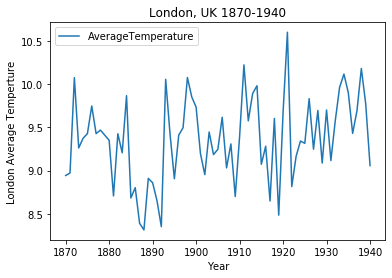

In [39]:
uk_avg_temp_o.plot(kind= 'line', y='AverageTemperature',title='London, UK 1870-1940')
plt.ylabel('London Average Temperture')
plt.savefig("graph/london.png")

In [40]:
taiwan_avg_temp = taiwan.groupby('Year').mean()
taiwan_avg_temp

,AverageTemperature
Year,
1870,22.282333
1871,22.337583
1872,22.281000
1873,21.903417
1874,22.041500
...,...
1936,21.977250
1937,22.577167
1938,22.486583


In [41]:
z = np.abs(stats.zscore(taiwan_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


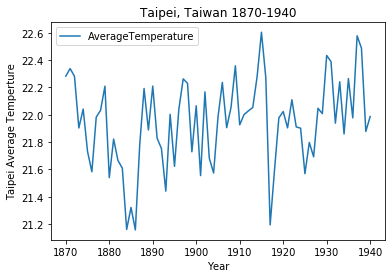

In [42]:
taiwan_avg_temp.plot(kind = 'line',title='Taipei, Taiwan 1870-1940')
plt.ylabel('Taipei Average Temperture')
plt.savefig("graph/taipei.png")

In [43]:
chicago_avg_temp = chicago.groupby('Year').mean()
z = np.abs(stats.zscore(chicago_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


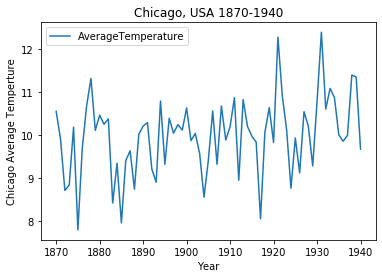

In [44]:
chicago_avg_temp.plot(kind = 'line', title='Chicago, USA 1870-1940')
plt.ylabel('Chicago Average Temperture')
plt.savefig("graph/chicago.png")

In [45]:
newyork_avg_temp = newyork.groupby('Year').mean()
z = np.abs(stats.zscore(newyork_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


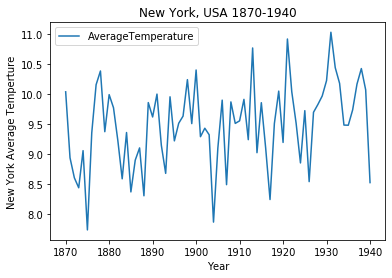

In [46]:
newyork_avg_temp.plot(kind = 'line',title='New York, USA 1870-1940')
plt.ylabel('New York Average Temperture')
plt.savefig("graph/newyork.png")

In [47]:
japan_avg_temp = tokyo.groupby('Year').mean()
z = np.abs(stats.zscore(japan_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([0], dtype=int64), array([0], dtype=int64))


In [48]:
japan_avg_temp = japan_avg_temp.iloc[1:71]

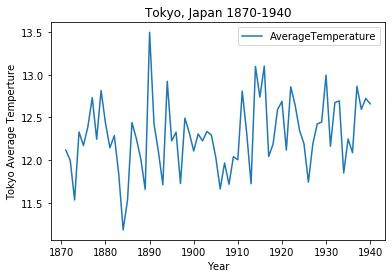

In [49]:
japan_avg_temp.plot(kind = "line",title='Tokyo, Japan 1870-1940')
plt.ylabel('Tokyo Average Temperture')
plt.savefig("graph/tokyo.png")

In [50]:
france_avg_temp = france.groupby('Year').mean()
z = np.abs(stats.zscore(france_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


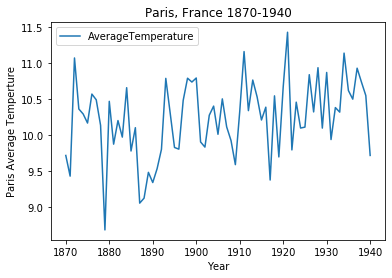

In [51]:
france_avg_temp.plot(kind= 'line', title='Paris, France 1870-1940')
plt.ylabel('Paris Average Temperture')
plt.savefig("graph/paris.png")

In [52]:
rome_avg_temp = italy.groupby('Year').mean()
z = np.abs(stats.zscore(france_avg_temp))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


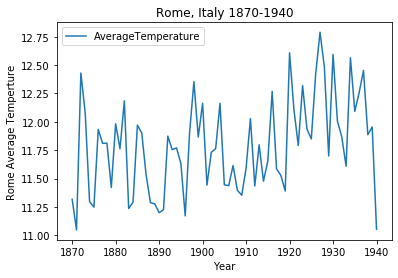

In [53]:
rome_avg_temp.plot(kind='line', title='Rome, Italy 1870-1940')
plt.ylabel('Rome Average Temperture')
plt.savefig("graph/rome.png")

In [54]:
germany_avg_temp = germany.groupby('Year').mean()
z = np.abs(stats.zscore(germany_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


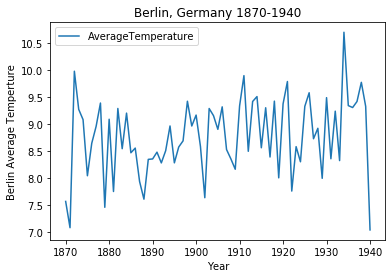

In [55]:
germany_avg_temp.plot(kind= "line", title='Berlin, Germany 1870-1940')
plt.ylabel('Berlin Average Temperture')
plt.savefig("graph/berlin.png")

In [56]:
peking_avg_temp = peking.groupby('Year').mean()
z = np.abs(stats.zscore(peking_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


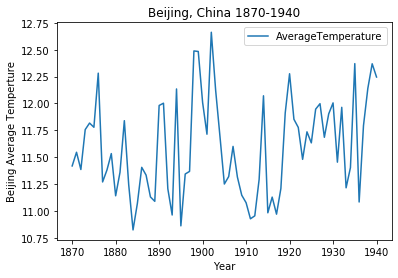

In [57]:
peking_avg_temp.plot(kind='line', title='Beijing, China 1870-1940')
plt.ylabel('Beijing Average Temperture')
plt.savefig("graph/beijing.png")

In [58]:
congo_avg_temp = congo.groupby('Year').mean()
z = np.abs(stats.zscore(congo_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


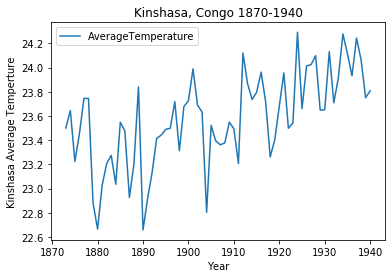

In [59]:
congo_avg_temp.plot(kind='line', title='Kinshasa, Congo 1870-1940')
plt.ylabel('Kinshasa Average Temperture')
plt.savefig("graph/kinshasa.png")

In [60]:
peru_avg_temp = peru.groupby('Year').mean()
z = np.abs(stats.zscore(peru_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([53], dtype=int64), array([0], dtype=int64))


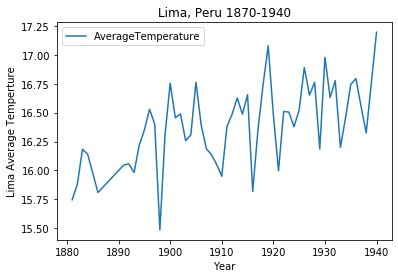

In [61]:
peru_avg_temp= peru_avg_temp[(z<3).all(axis=1)]
peru_avg_temp.plot(kind='line', title='Lima, Peru 1870-1940')
plt.ylabel('Lima Average Temperture')
plt.savefig("graph/lima.png")

In [62]:
turkey_avg_temp = turkey.groupby('Year').mean()
z = np.abs(stats.zscore(peru_avg_temp))
threshold = 3 
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


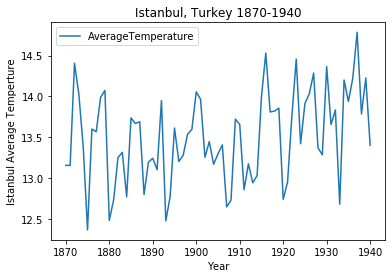

In [63]:
turkey_avg_temp.plot(kind='line', title='Istanbul, Turkey 1870-1940')
plt.ylabel('Istanbul Average Temperture')
plt.savefig("graph/istanbul.png")

In [64]:
city = city_df

In [65]:
connection_string = "postgres:postgres@localhost:5432/project2"
engine = create_engine(f'postgresql://{connection_string}')

ModuleNotFoundError: No module named 'psycopg2'

In [ ]:
engine.table_names()

In [ ]:
connection = engine.raw_connection()

In [ ]:
cur = connection.cursor()

In [ ]:
city.to_sql('city_df', con=engine, if_exists='append', index=False)

In [ ]:
pd.read_sql_query('select * from netflix_rating', con=engine).head()